# **Data Science - Principles and applications - Final project - Due date 04/12/2025**
__________
### Analyzing TCL validation data to extract typical day profiles and to highlight days that show abnormal usage due to disruptions, events, or changes in mobility habits

R. ARNAUD, M. DELPLANQUE, E. GASTARD (ENTPE)

Lecturers: A. FURNO, T. LEMOALLE (ENTPE / UGE)

**Dataset : Public Transport Validation Data (SYTRAL) - Time period : from 1 November 2019 to 30 March 2020**
__________

## **1. Preliminary works**

Preliminary works done on the datasets to make the study possible.

#### Append the project folder to sys.path

In [1]:
# Add project root to sys.path for module imports
from pathlib import Path # Path manipulations
import sys,os # System and OS operations
# cwd() = notebooks/
project_root = Path.cwd().parent  # → repository/
if str(project_root) not in sys.path: # To avoid duplicates
    sys.path.append(str(project_root))
print("Project root added to PATH:", project_root)

Project root added to PATH: c:\Users\maxde\Desktop\Cours\ENTPE 3e année\Data Science\DSPAP\Project data\PT\DSPAP-Project-2025-ARNAUD-DELPLANQUE-GASTARD


#### Import of the necessary libraries

In [2]:
# Import necessary core libraries
import pandas as pd             # Data manipulation
import matplotlib.pyplot as plt # Data visualization
import geopandas as gpd         # Geospatial data handling
import seaborn as sns           # Advanced data visualization
import sys,os                   # System and OS operations
import warnings                 # Warning management
warnings.filterwarnings("ignore") # Ignore warnings for cleaner output
# Avoid the conflict libiomp / libomp
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
# Fix scikit-learn KMeans leaks + freeze Matplotlib
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
print("Successfully loaded the core libraries.")                # Display current sys.path

Successfully loaded the core libraries.


#### Import of the project modules (homemade libraries)

In [3]:
import src.preprocessing as prep    # Data loading and preprocessing
import src.filters as filters       # Pandas filter functions
import src.plot as plot             # Plotting functions
import src.df_operations as df_ops # DataFrame operations
import src.utils as utils               # Utility functions
import src.clustering as clustering   # Clustering functions
print("Successfully imported project modules.")

Data loaded: bus = (11902854, 2) tramway = (1916230, 2) subway = (12283, 2)
Successfully imported project modules.


#### Apply filters to the datasets

In [4]:
# Load preprocessed datasets
df_bus, df_tramway, df_subway = prep.load_data()
print("Datasets loaded successfully.")
print("Applying filters to datasets...")    

# Apply filters to datasets

bus_filtered    = filters.apply_all_filters(df_bus)
tram_filtered   = filters.apply_all_filters(df_tramway)
subway_filtered = filters.apply_all_filters(df_subway)

# Extract filtered datasets

df_bus_no_covid     = bus_filtered["no_covid"]
df_tramway_no_covid  = tram_filtered["no_covid"]
df_subway_no_covid  = subway_filtered["no_covid"]

df_bus_christmas    = bus_filtered["christmas"]
df_tramway_christmas = tram_filtered["christmas"]
df_subway_christmas  = subway_filtered["christmas"]

df_bus_february     = bus_filtered["february"]
df_tramway_february  = tram_filtered["february"]
df_subway_february  = subway_filtered["february"]

df_bus_lumieres     = bus_filtered["lumieres"]
df_tramway_lumieres  = tram_filtered["lumieres"]
df_subway_lumieres  = subway_filtered["lumieres"]

df_bus_no_holiday   = bus_filtered["no_holiday"]
df_tramway_no_holiday= tram_filtered["no_holiday"]
df_subway_no_holiday= subway_filtered["no_holiday"]


print("Filters applied successfully.")

display(df_bus_no_holiday,df_tramway_no_holiday, df_subway_no_holiday)
display(df_bus_no_holiday.shape,df_tramway_no_holiday.shape, df_subway_no_holiday.shape)
print("Filtered datasets displayed.")

Datasets loaded successfully.
Applying filters to datasets...
Applied filters for dataset 'bus': [no_covid, christmas, february, lumieres, no_holiday]
Applied filters for dataset 'tramway': [no_covid, christmas, february, lumieres, no_holiday]
Applied filters for dataset 'subway': [no_covid, christmas, february, lumieres, no_holiday]
Filters applied successfully.


,date,Flow
0,2019-11-01 12:15:00,1
1,2019-11-02 10:30:00,1
2,2019-11-02 12:00:00,1
3,2019-11-04 08:00:00,1
4,2019-11-04 08:15:00,1
...,...,...
11902843,2020-01-09 00:45:00,4
11902844,2020-01-09 01:00:00,9
11902845,2020-01-09 01:15:00,8
11902852,2020-02-07 01:00:00,4


,date,Flow
0,2019-11-02 15:00:00,66
1,2019-11-02 17:30:00,53
2,2019-11-02 17:45:00,72
3,2019-11-02 18:30:00,26
4,2019-11-03 04:45:00,1
...,...,...
1915960,2020-03-15 20:00:00,1
1915961,2020-03-15 20:30:00,1
1915962,2020-03-15 22:00:00,2
1916228,2020-02-06 08:00:00,5


,date,Flow
0,2019-11-01 00:00:00,1343.0
1,2019-11-01 00:15:00,618.0
2,2019-11-01 00:30:00,76.0
3,2019-11-01 00:45:00,1.0
4,2019-11-01 04:15:00,4.0
...,...,...
11060,2020-03-15 22:45:00,464.0
11061,2020-03-15 23:00:00,446.0
11062,2020-03-15 23:15:00,417.0
11063,2020-03-15 23:30:00,354.0


(9497955, 2)

(1429199, 2)

(8615, 2)

Filtered datasets displayed.


#### Data visualization

In [5]:
df_bus, df_tramway, df_subway = prep.load_data() # Load preprocessed data
print("Datasets loaded successfully.")

Datasets loaded successfully.


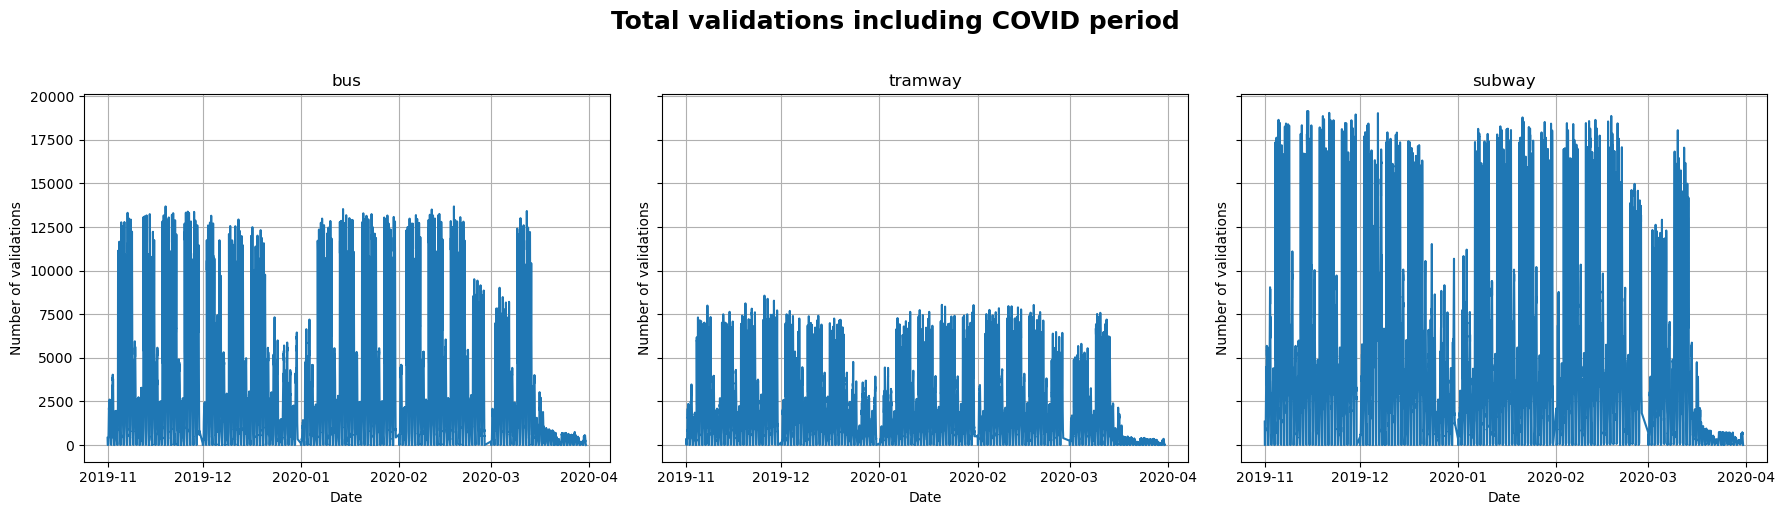

In [6]:
# Visualize total validations for each transport mode (including covid period)
plot.plot_validations((df_bus,df_tramway,df_subway),title="Total validations including COVID period")

> Overall regularity untill covid-19 period

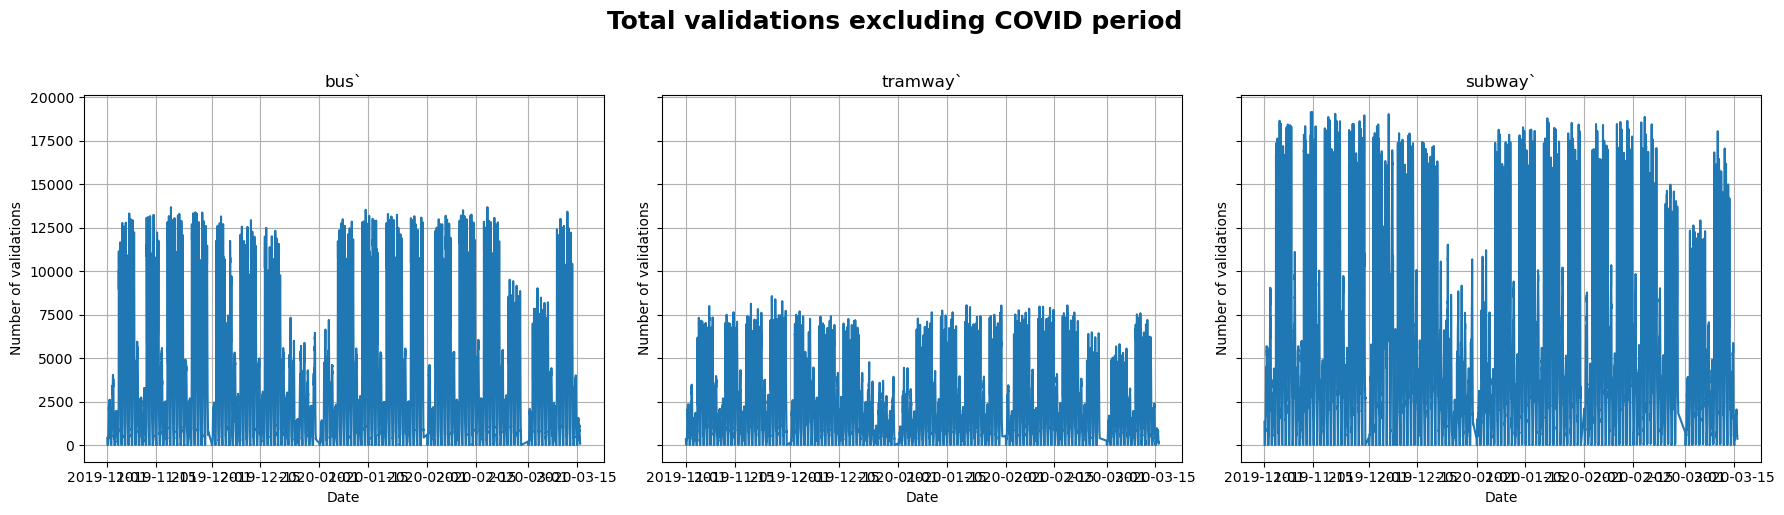

In [7]:
# Visualize total validations for each transport mode (without covid period)
plot.plot_validations((df_bus_no_covid,df_tramway_no_covid,df_subway_no_covid),title="Total validations excluding COVID period")

> Overall regularity without covid period, except for holidays

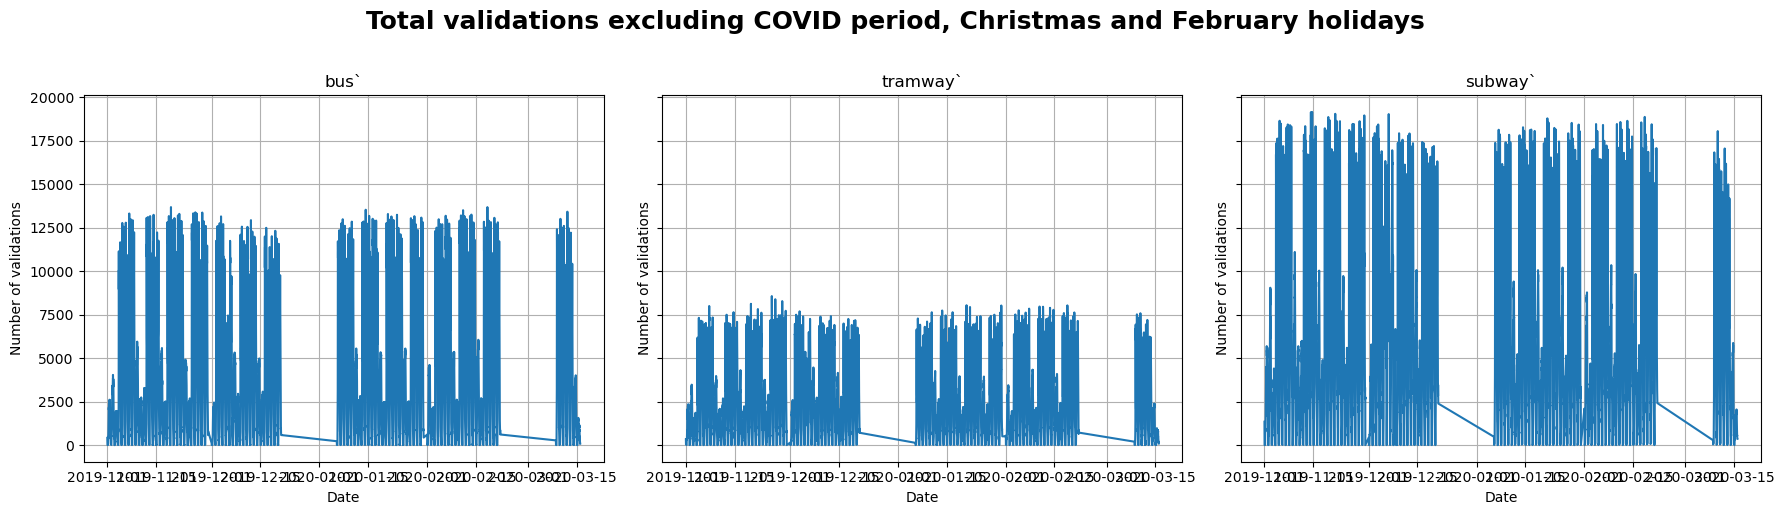

In [8]:
# Visualize total validations excluding Christmas and February holidays
plot.plot_validations((df_bus_no_holiday,df_tramway_no_holiday,df_subway_no_holiday),title="Total validations excluding COVID period, Christmas and February holidays")

> Overall regularity

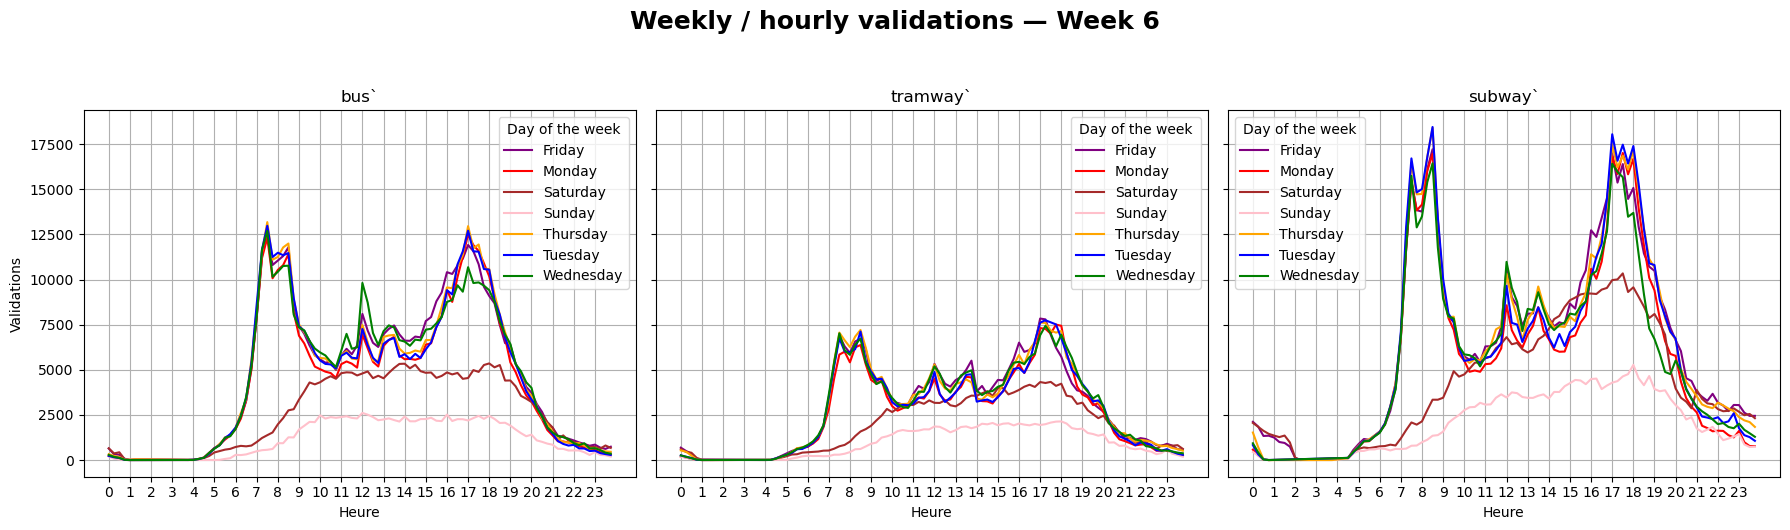

In [9]:
plot.plot_week((df_bus_no_holiday,df_tramway_no_holiday,df_subway_no_holiday),week_nbr=6, color=True, superpose=True)

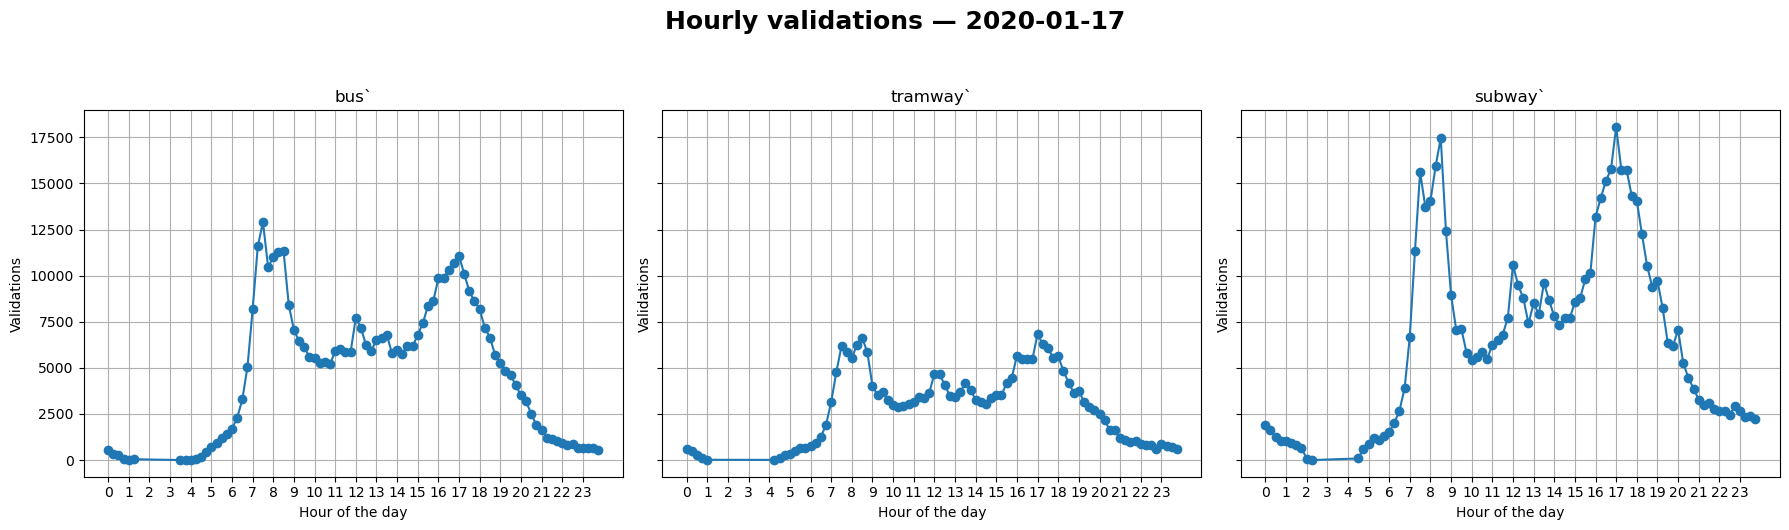

In [10]:
plot.plot_day((df_bus_no_holiday,df_tramway_no_holiday,df_subway_no_holiday), date_str='2020-01-17')

#### Add the Time_Period feature
> This step introduces a new categorical feature, Time_Period, which assigns each observation to one of several calendar-based periods:
> - Regular week
> - School holidays (with the specific holiday type identified)
> - COVID period
> - Fête des Lumières
>This feature helps distinguish normal operating days from exceptional periods that significantly impact validation patterns.

In [11]:
# Add a feature for time periods which assigns each observation to one of several time periods
df_bus = df_ops.add_week_regularity_feature(df_bus)
df_tramway = df_ops.add_week_regularity_feature(df_tramway)
df_subway = df_ops.add_week_regularity_feature(df_subway)

In [12]:
df_global = pd.concat([df_bus,df_tramway,df_subway]) # Merge dataframes
# df_global = df_ops.merge_dataframes([df_bus_no_holiday,df_tramway_no_holiday,df_subway_no_holiday]) # Merge dataframes
df_global["Time_Period"].value_counts().apply(utils.intervals_to_duration) # Calculate total duration per time period
display(df_global.head())
display(df_global.shape)
display(df_global["Time_Period"].value_counts().apply(utils.intervals_to_duration))

,date,Flow,date_only,Time_Period
0,2019-11-01 12:15:00,1.0,2019-11-01,Regular week
1,2019-11-02 10:30:00,1.0,2019-11-02,Regular week
2,2019-11-02 12:00:00,1.0,2019-11-02,Regular week
3,2019-11-04 08:00:00,1.0,2019-11-04,Regular week
4,2019-11-04 08:15:00,1.0,2019-11-04,Regular week


(13831367, 4)

Time_Period
Regular week           488.0 days 7.0 hours 2 minutes
Winter holidays       65.0 days 20.0 hours 45 minutes
Christmas holidays    51.0 days 18.0 hours 24 minutes
COVID period           18.0 days 3.0 hours 59 minutes
Fête des Lumières      16.0 days 5.0 hours 58 minutes
Name: count, dtype: object

In [29]:
# plot.plot_day_variation((df_global),normalize=False)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001333048D300> (for post_execute), with arguments args (),kwargs {}:


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. matplotlib.backends._backend_agg.RendererAgg(width: int, height: int, dpi: float)

Invoked with: 8298820200, 600, 100.0

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. matplotlib.backends._backend_agg.RendererAgg(width: int, height: int, dpi: float)

Invoked with: 8298820200, 600, 100.0

<Figure size 8.29882e+09x600 with 59 Axes>

In [ ]:
# plot.plot_day_variation((df_global),normalize=True)

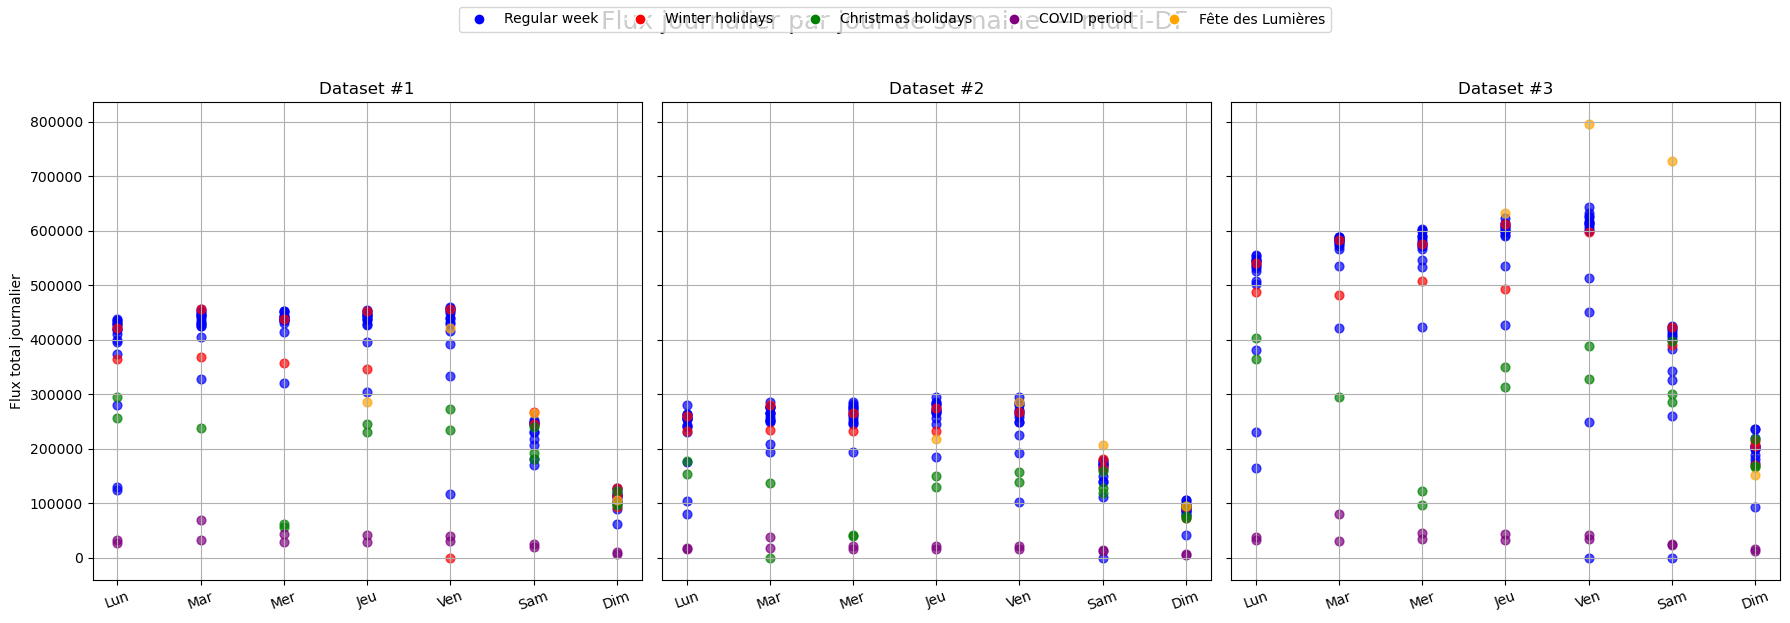

In [15]:
plot.plot_day_variation((df_bus, df_tramway, df_subway),normalize=False)

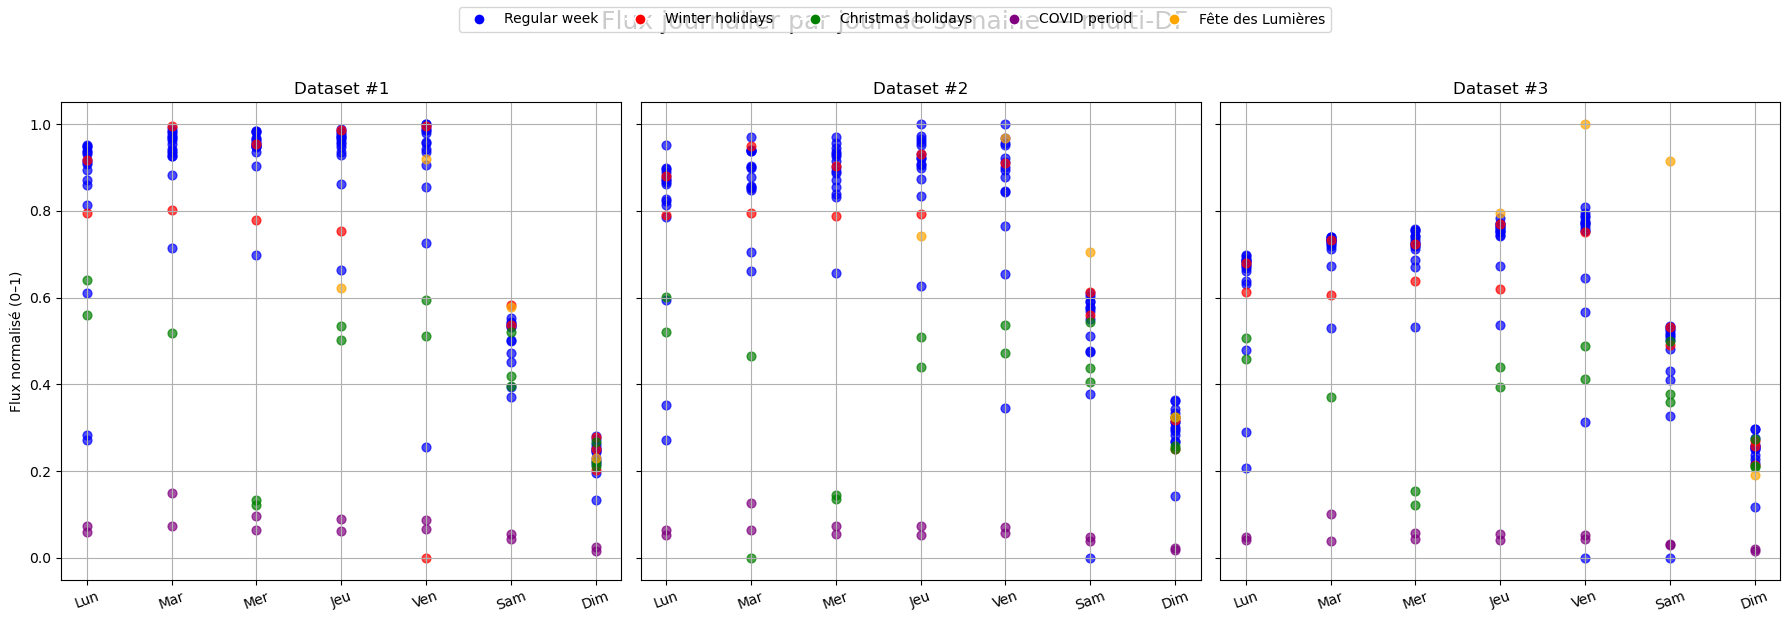

In [16]:
plot.plot_day_variation((df_bus, df_tramway, df_subway),normalize=True)

#### Clusering part
> This step introduces to the clustering part\
> First, we have to select the number of clusters thanks to the ankle method\
> Then we create clusters thanks to the Kmeans method\
> Then we analyse the results

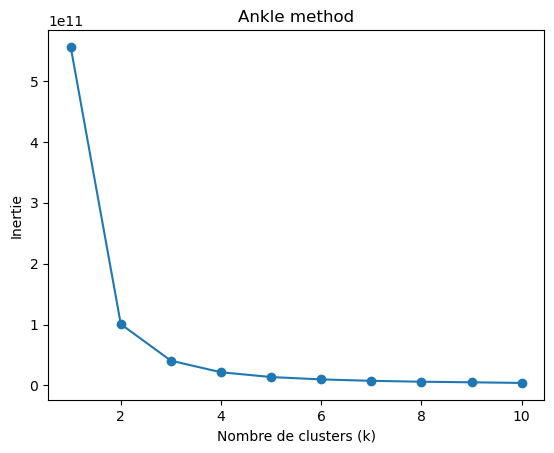

In [28]:
## Création du graphique "Ankle method" pour déterminer le nombre optimal de clusters via la méthode du coude

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inerties = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_global[['Flow']])
    inerties.append(kmeans.inertia_)

plt.plot(range(1, 11), inerties, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Ankle method')
plt.show()


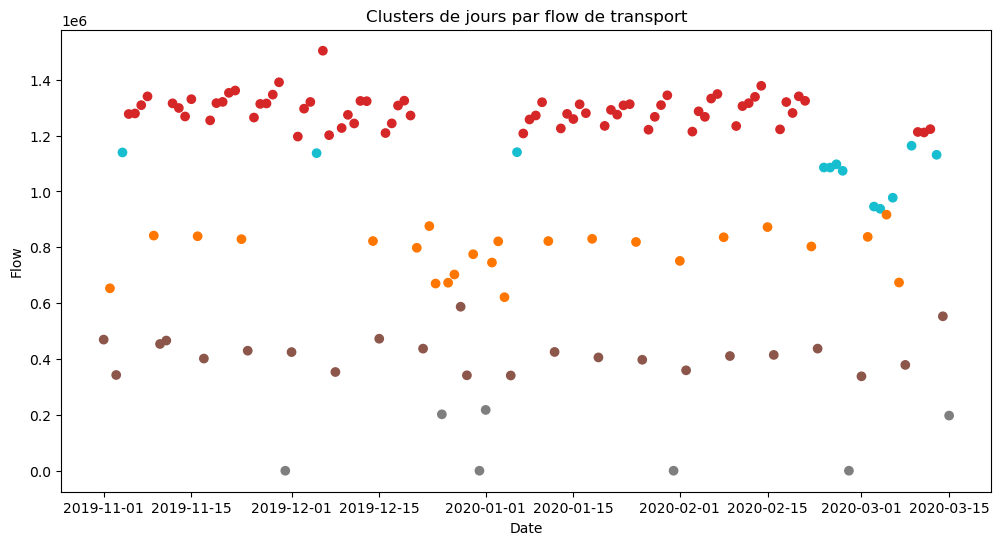

In [18]:
date_debut_covid = pd.to_datetime(filters.COVID_START_DATE).date()
df_cluster = clustering.cluster_kmeans_days(df_global, n_clusters=5, date_limit=date_debut_covid)
clustering.plot_cluster(df_cluster, cmap=clustering.colors[1:])

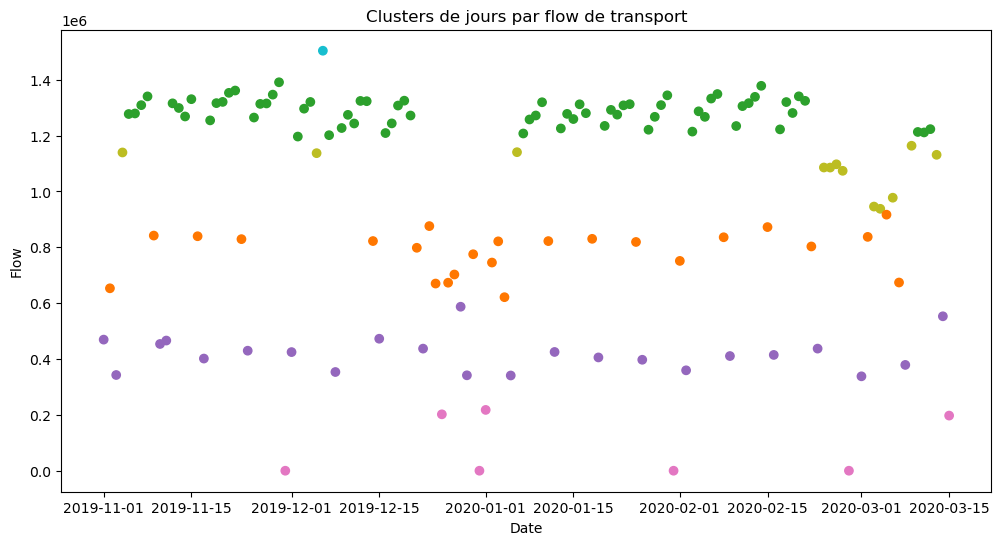

In [19]:

date_debut_covid = filters.COVID_START_DATE
df_cluster = clustering.cluster_kmeans_days(df_global, n_clusters=6, date_limit=date_debut_covid)
clustering.plot_cluster(df_cluster, cmap=clustering.colors[1:])

#### In-cluster day repartition

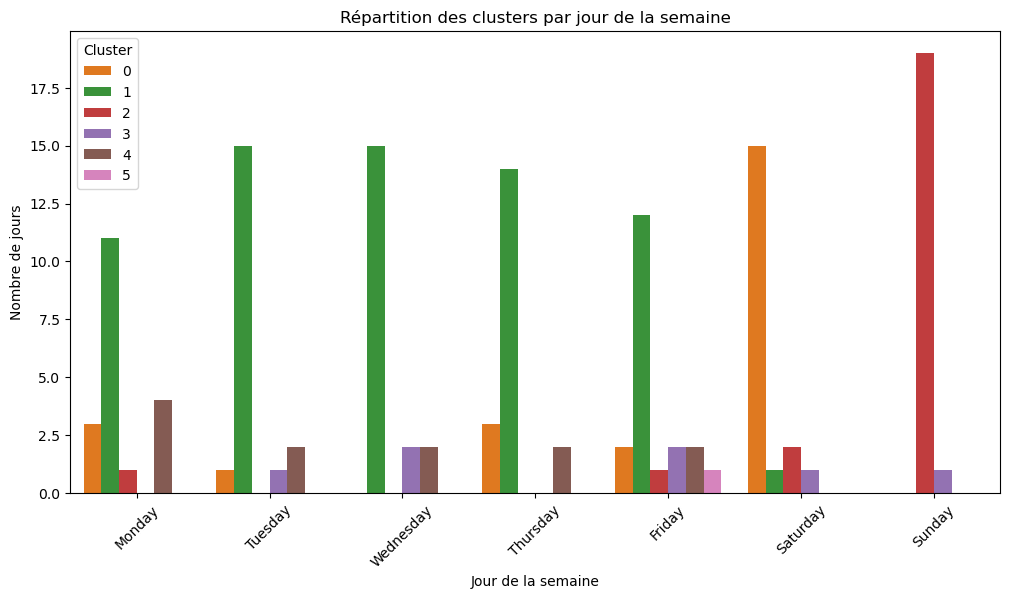

In [20]:
clustering.plot_cluster_distribution(df_cluster, clustering.colors[1:])

#### Calendar cluster creation

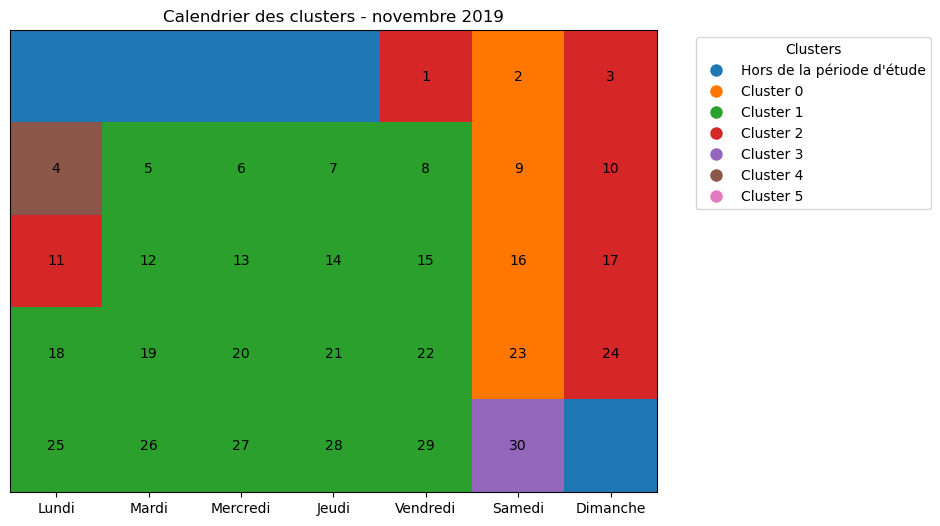

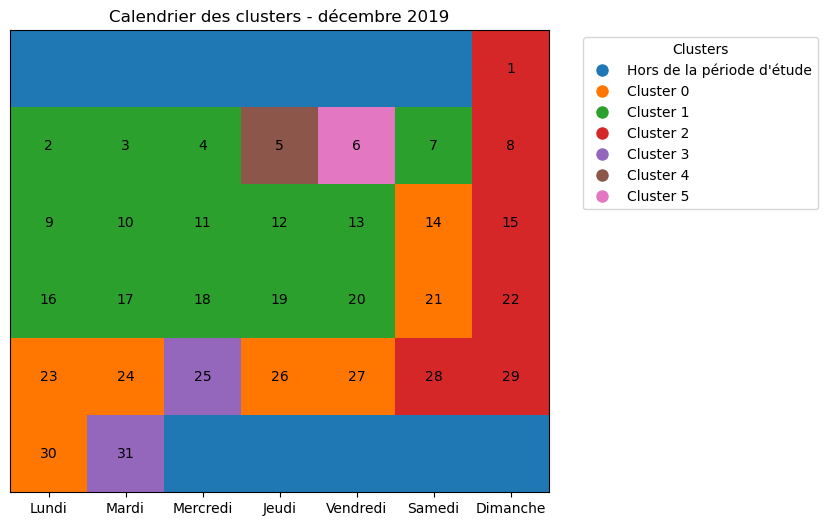

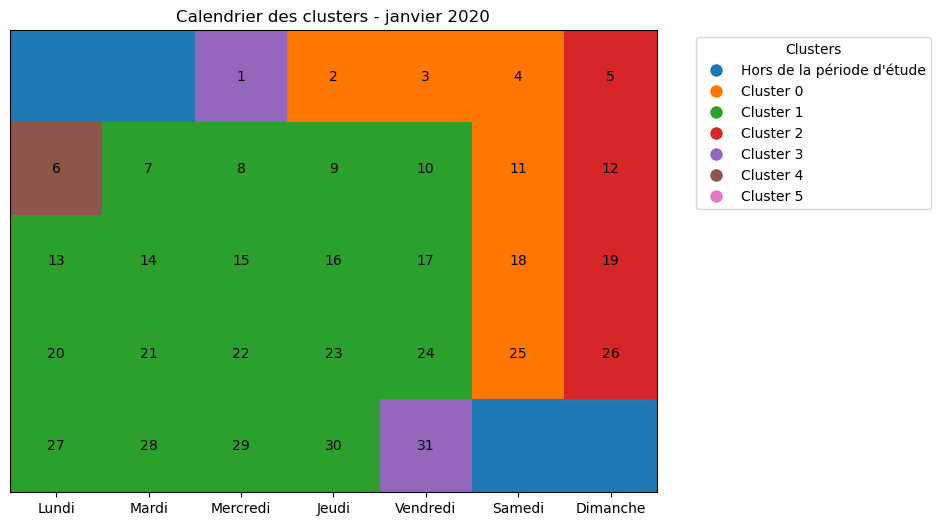

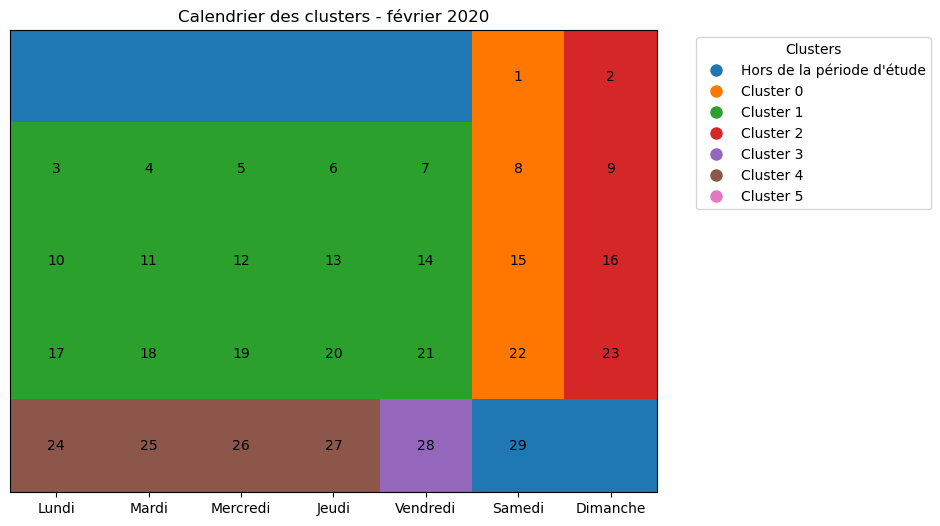

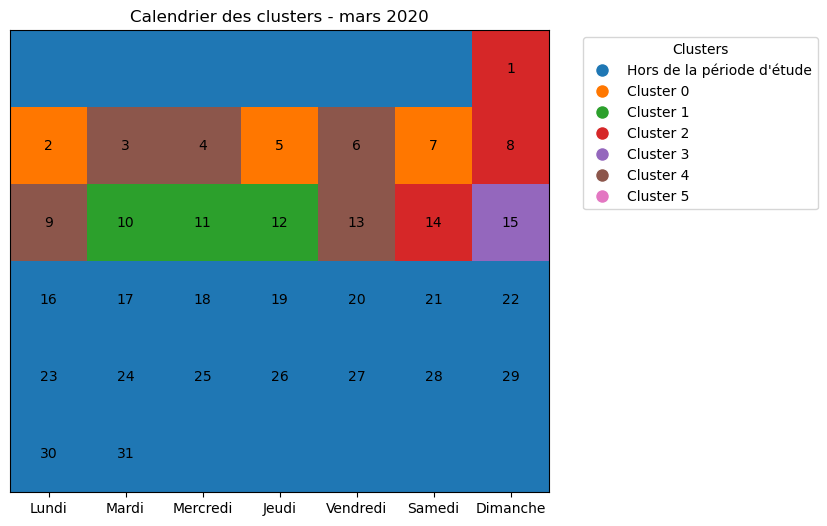

In [30]:
clustering.plot_cluster_calendar(df_cluster, year=2019, month=11, cluster_col='cluster', cluster_colors=clustering.colors)
clustering.plot_cluster_calendar(df_cluster, year=2019, month=12, cluster_col='cluster', cluster_colors=clustering.colors)
clustering.plot_cluster_calendar(df_cluster, year=2020, month=1, cluster_col='cluster', cluster_colors=clustering.colors)
clustering.plot_cluster_calendar(df_cluster, year=2020, month=2, cluster_col='cluster', cluster_colors=clustering.colors)
clustering.plot_cluster_calendar(df_cluster, year=2020, month=3, cluster_col='cluster', cluster_colors=clustering.colors)

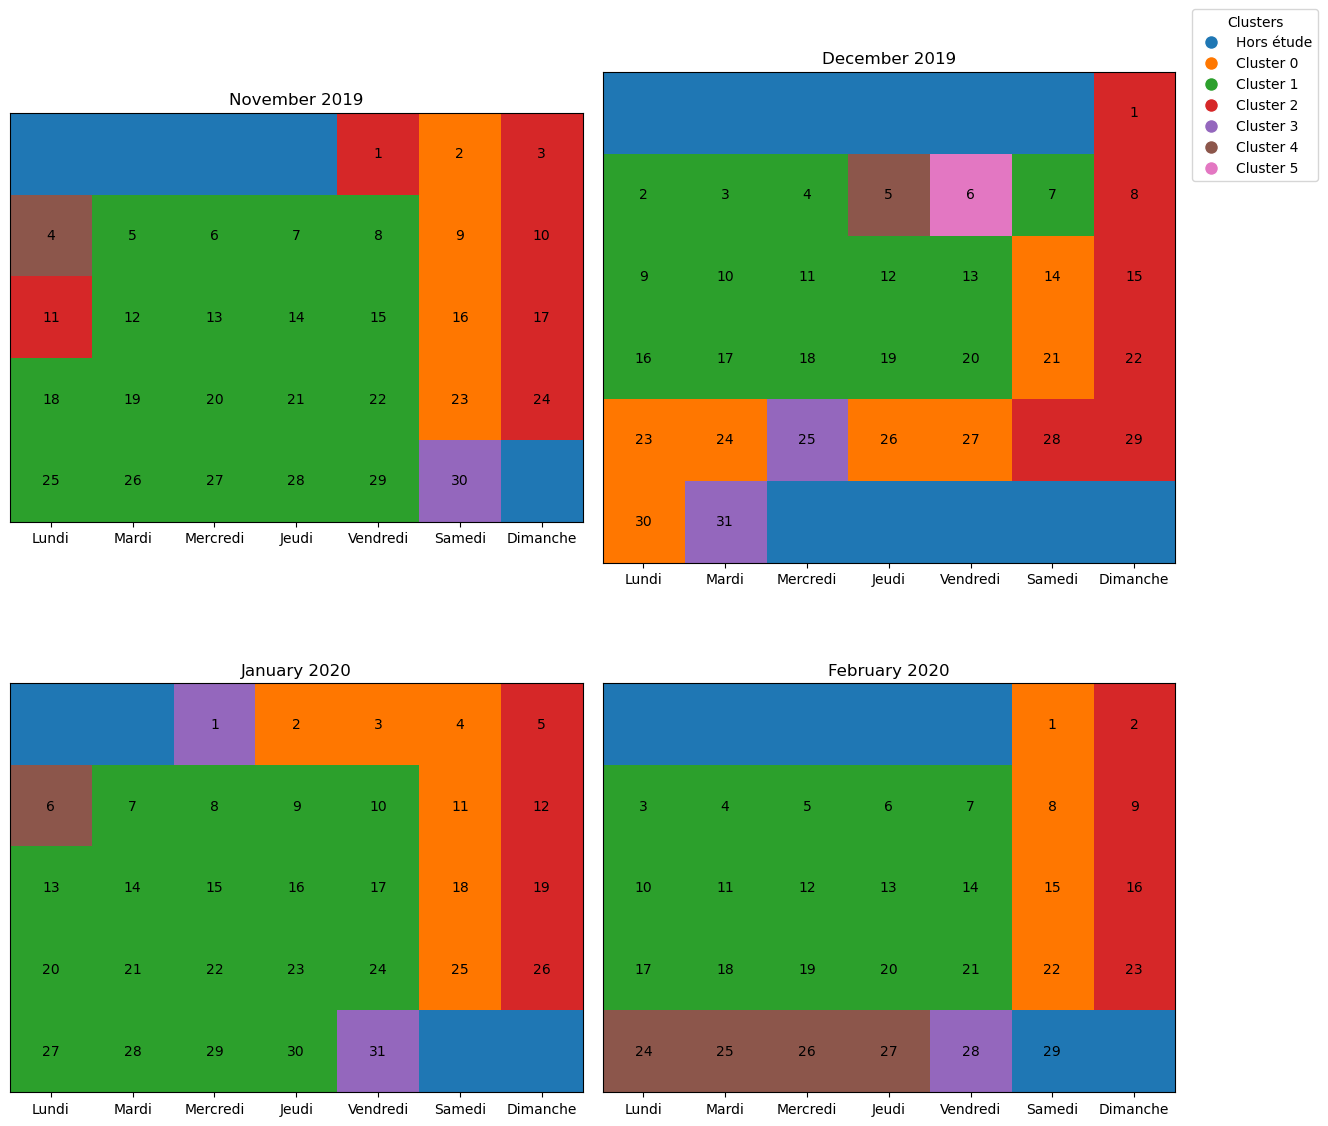

In [24]:
clustering.plot_cluster_calendars_as_subplots(df_cluster, start_year=2019, start_month=11, end_year=2020, end_month=2, cluster_colors=clustering.colors)

#### Average day per cluster

In [25]:
# Création de journées types par cluster

df_clustered_days = clustering.create_typical_days_per_cluster(df_global, df_cluster, cluster_col='cluster')
df_clustered_days

,date,Flow,date_only,cluster,time
0,2019-11-01 00:00:00,2087.0,2019-11-01,2.0,00:00:00
1,2019-11-01 00:15:00,1118.0,2019-11-01,2.0,00:15:00
2,2019-11-01 00:30:00,429.0,2019-11-01,2.0,00:30:00
3,2019-11-01 00:45:00,65.0,2019-11-01,2.0,00:45:00
4,2019-11-01 01:00:00,13.0,2019-11-01,2.0,01:00:00
...,...,...,...,...,...
11482,2020-03-15 22:45:00,793.0,2020-03-15,3.0,22:45:00
11483,2020-03-15 23:00:00,762.0,2020-03-15,3.0,23:00:00
11484,2020-03-15 23:15:00,633.0,2020-03-15,3.0,23:15:00
11485,2020-03-15 23:30:00,604.0,2020-03-15,3.0,23:30:00


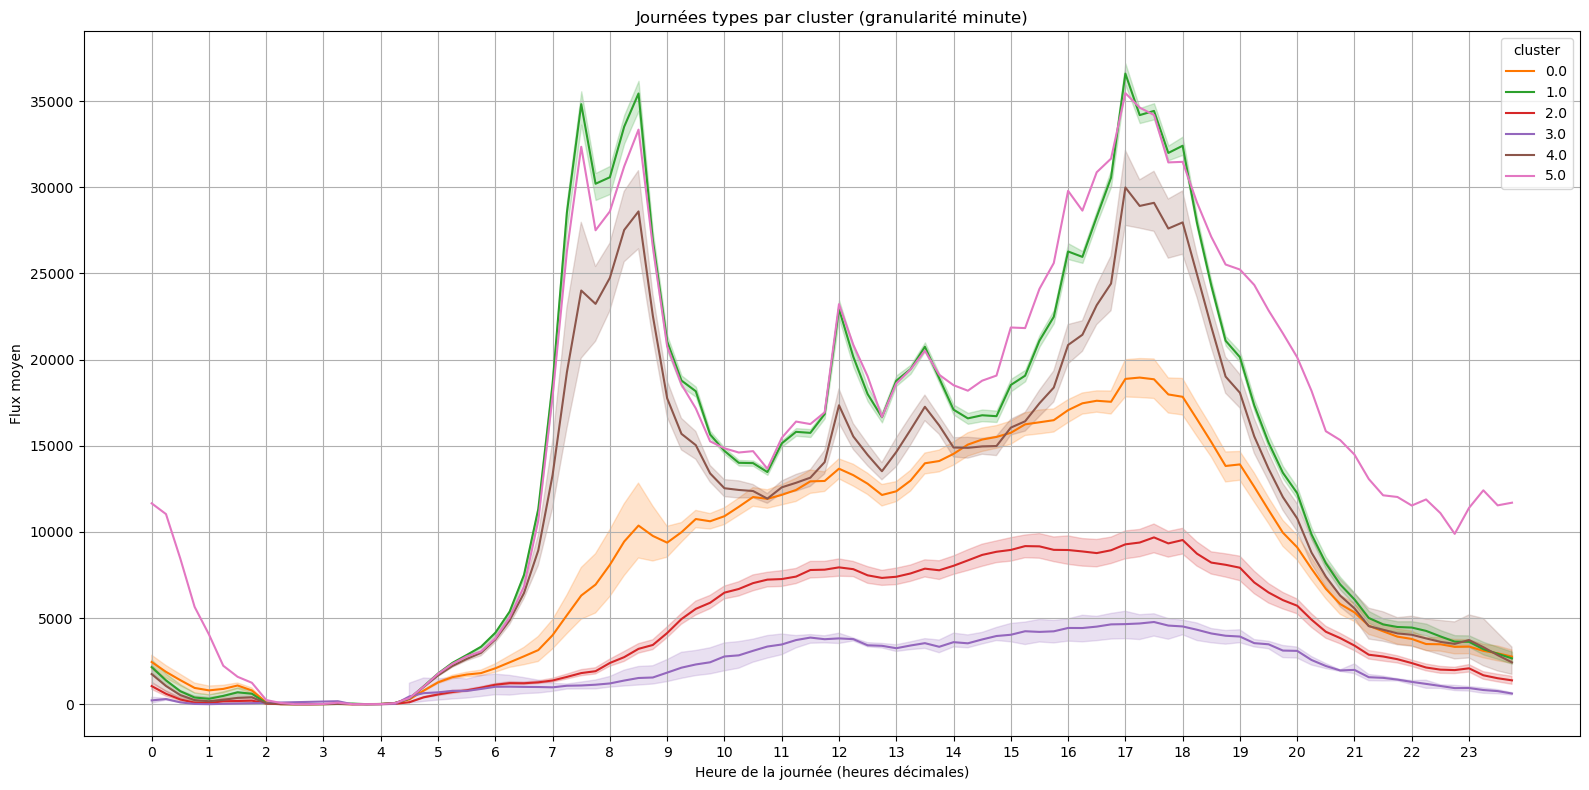

In [ ]:
# Affichage des journées types par cluster

clustering.plot_typical_days_per_cluster(df_clustered_days, cluster_col='cluster', cluster_colors=clustering.colors[1:])